In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
## a function for plotting the decision boundary
# Set min and max values and give it some padding
def decision_boundary(X,y,clf,ax):
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100).reshape(-1,1), np.linspace(y_min, y_max, 100).reshape(-1,1))
    # Predict the function value for the whole gid
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new) # Translates slice objects to concatenation along the second axis
    print(y_pred.shape)
    zz = y_pred.reshape(xx.shape)
    print(zz.shape)
    # Plot the contour and training examples
    #fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap
    cm2 = ListedColormap(['#0000aa', '#ff2020'])
    ax.contourf(xx, yy, zz,alpha=.4, cmap=cm2) 
    ax.scatter(X[:, 0], X[:, 1], c =y)
    ax.set_xlabel('feature1')
    ax.set_ylabel('feature2')
    return ax

Text(0, 0.5, 'feature2')

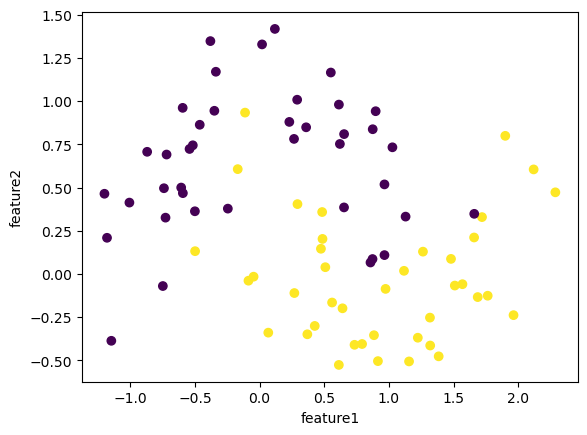

In [4]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise = 0.25, random_state=3)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.scatter(X_train[:,0],X_train[:,1], marker = 'o', c= y_train)
plt.xlabel('feature1')
plt.ylabel('feature2')

Text(0, 0.5, 'feature2')

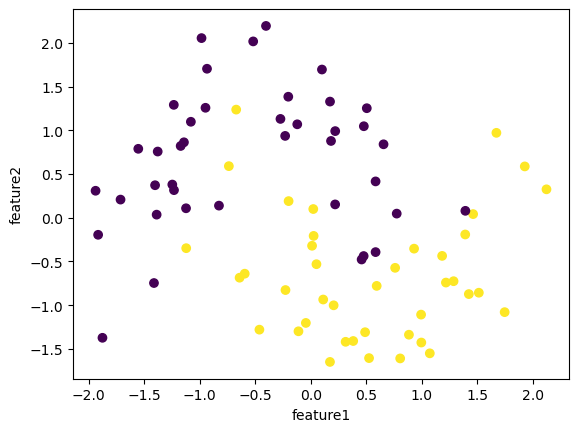

In [5]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], marker = 'o', c= y_train)
plt.xlabel('feature1')
plt.ylabel('feature2')

In [6]:
from sklearn.svm import LinearSVC
model = LinearSVC()
clf_svm = model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf_svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_svm.score(X_test, y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.800


(10000,)
(100, 100)


<Axes: xlabel='feature1', ylabel='feature2'>

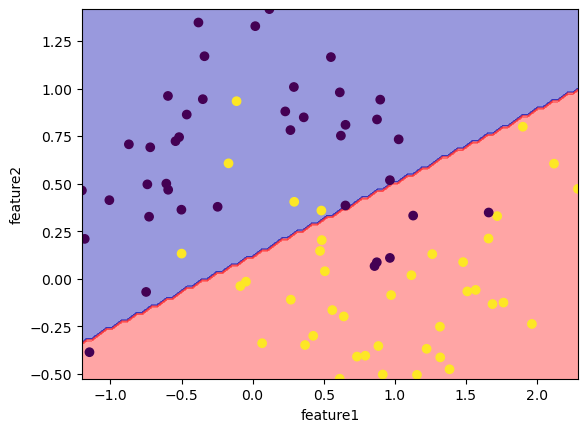

In [7]:
ax = plt.gca()
decision_boundary(X_train,y_train,clf_svm,ax)

### Cross Validation for hyperparameter tuning 

In [10]:
from sklearn.model_selection import GridSearchCV

parameters_dictionary = { 'C':[0.0001, 1, 10]}
svc = LinearSVC(max_iter=5000)

grid_search = GridSearchCV(svc,
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 1) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000),
             param_grid={'C': [0.0001, 1, 10]}, return_train_score=True,
             scoring='f1', verbose=1)

In [11]:
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: LinearSVC(C=1, max_iter=5000)
The best parameter values were: {'C': 1}
The best f1-score was: 0.8402987861811392
